In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#load and preprocessing the augmanted images
#from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
#from keras.preprocessing.image import image_dataset_from_directory 
import os
import zipfile
# Directory with our training pictures
train_chest = os.path.join('gdrive/My Drive/dataset_sa/train/')


from tensorflow.keras.preprocessing.image import ImageDataGenerator

#crate the image generator to (resize, normalize, filter and augmantation) images
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale=1./255,
      validation_split=0.2,
      fill_mode='nearest')


# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_chest,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=32,
        shuffle=False,
        subset='training',
        # Since we use categorical_crossentropy loss, 
        class_mode='categorical')

# Flow validation images in batches of 64 using validation_datagen generator
validation_generator = train_datagen.flow_from_directory(
        train_chest, # This is the source directory for validation images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=32,
        shuffle=False,
        subset='validation',
        # Since we use categorical_crossentropy loss, 
        class_mode='categorical')




Found 37642 images belonging to 6 classes.
Found 9408 images belonging to 6 classes.


80150528/80134624 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 512)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 7, 7, 256)         3277056   
_________________________________________________________________
activation (Activation)      (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         819328    
_________________________________________________________________
activation_1 (Activation)    (None, 7, 7, 128)         0         
_________________________________________________________

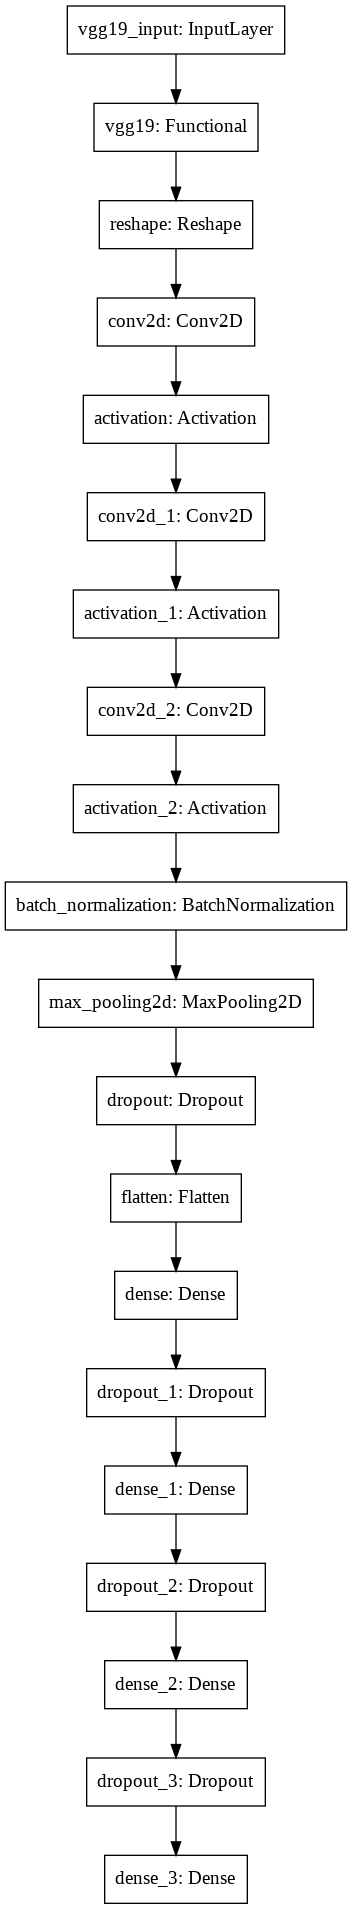

In [ ]:
#vgg+cnn NNNNNNNNNNNNNNNNNNN
import numpy as np
import keras
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
import numpy as np
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
import os
import zipfile
import tensorflow as tf
import numpy as np
import keras
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
import numpy as np
import os
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D,AveragePooling2D# convolution layers
from keras.layers import Dense, Dropout, Flatten,Activation,Reshape # core layers1
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from keras import regularizers



def createModel():
   top_model = Sequential()
   top_model.add(VGG19(include_top=False,weights="imagenet",input_shape=(224,224,3)))
   top_model.add(Reshape((7,7,512), input_shape=(-1,7,7,512)))
   top_model.add(Conv2D(256,  5, padding="same",kernel_initializer='random_normal',bias_initializer='zeros', kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
   top_model.add(Activation('relu'))
   top_model.add(Conv2D(128,  5, padding="same"))
   top_model.add(Activation('relu'))
   top_model.add(Conv2D(64,  5, padding="same"))
   top_model.add(Activation('relu'))
   top_model.add(BatchNormalization())
   top_model.add(MaxPooling2D(pool_size=3 ,strides=3))
   top_model.add(Dropout(0.5))
   top_model.add(Flatten())
   top_model.add(Dense(512, activation='relu'))
   top_model.add(Dropout(0.4))
   top_model.add(Dense(256, activation='relu'))
   top_model.add(Dropout(0.3))
   top_model.add(Dense(128, activation='relu'))
   top_model.add(Dropout(0.2))
   top_model.add(Dense(6, activation='softmax'))
   
   return top_model

model=createModel()
model.summary()
keras.utils.plot_model(model, "my_first_model.png")

Epoch 1/1000
8/8 [==============================] - 7s 664ms/step - loss: 0.2738 - tp: 233.0000 - fp: 18.0000 - tn: 1262.0000 - fn: 23.0000 - accuracy: 0.9180 - precision: 0.9283 - recall: 0.9102 - auc: 0.9923 - val_loss: 0.3156 - val_tp: 228.0000 - val_fp: 16.0000 - val_tn: 1264.0000 - val_fn: 28.0000 - val_accuracy: 0.9141 - val_precision: 0.9344 - val_recall: 0.8906 - val_auc: 0.9919
Epoch 2/1000
8/8 [==============================] - 4s 477ms/step - loss: 0.2170 - tp: 243.0000 - fp: 6.0000 - tn: 1274.0000 - fn: 13.0000 - accuracy: 0.9688 - precision: 0.9759 - recall: 0.9492 - auc: 0.9949 - val_loss: 0.3519 - val_tp: 224.0000 - val_fp: 27.0000 - val_tn: 1253.0000 - val_fn: 32.0000 - val_accuracy: 0.8828 - val_precision: 0.8924 - val_recall: 0.8750 - val_auc: 0.9895
Epoch 3/1000
8/8 [==============================] - 4s 530ms/step - loss: 0.2263 - tp: 240.0000 - fp: 12.0000 - tn: 1268.0000 - fn: 16.0000 - accuracy: 0.9492 - precision: 0.9524 - recall: 0.9375 - auc: 0.9947 - val_loss:

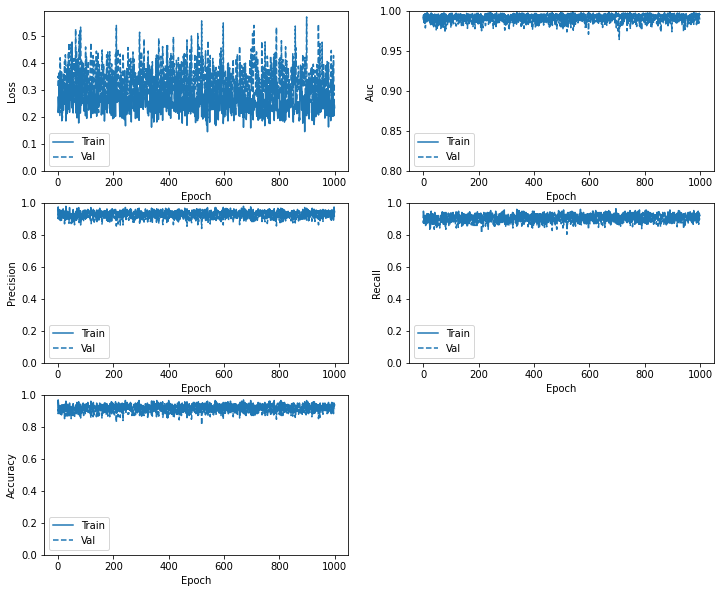

In [ ]:
# train the model
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D,AveragePooling2D# convolution layers
from keras.layers import Dense, Dropout, Flatten,Activation # core layers1
from tensorflow.keras.optimizers import RMSprop, Adamax
import tensorflow as tf
from tensorflow import keras
 
import os
import tempfile
 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras.optimizers import SGD, Adam
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import regularizers

classes_no=8

#MobileNetV2 using trained weights model
import numpy as np
import keras
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten

from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
import numpy as np

import os
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
import os
import zipfile
import tensorflow as tf
import numpy as np
import keras
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
import numpy as np
import os
import tensorflow as tf

from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D,AveragePooling2D# convolution layers
from keras.layers import Dense, Dropout, Flatten,Activation,Reshape # core layers1
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

#opt = RMSprop(learning_rate=0.001) 
#opt = SGD(lr= 0.00006, momentum=0.9)    
#opt = Adamax(lr= 0.000009, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
    # Compile model

opt=Adam(learning_rate= 0.000009)  

METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.CategoricalAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
  ]
   
model.compile(loss='categorical_crossentropy', optimizer= opt ,metrics=[METRICS])

model_checkpoint_callback = ModelCheckpoint(
    filepath='gdrive/My Drive/dataset_sa/models/vgg5/Epochvgg_{epoch:03d}.h5'
    ,save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True 
 )
history = model.fit(
      train_generator,
      steps_per_epoch=8,
      callbacks=[model_checkpoint_callback],
      epochs=1000,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8) 
       
#Save and serialize
model.save('gdrive/My Drive/dataset_sa/models/vgg5/DCvggcnn77.h5')
print('model saved!!!!!')


#Plot accuracy
import matplotlib as mpl
import matplotlib.pyplot as plt
def plot_metrics(history):
  metrics =  ['loss', 'auc', 'precision', 'recall', 'accuracy']
  mpl.rcParams['figure.figsize'] = (12, 10)
  colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(3,2,n+1)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    elif metric == 'accuracy':
      plt.ylim([0,1])  
    else:
      plt.ylim([0,1])
 
    plt.legend()
 
plot_metrics(history)



In [ ]:
import keras
from keras.models import load_model
model = keras.models.load_model('gdrive/My Drive/dataset_sa/models/vgg4/DCvggcnn66.h5')
#model = load_weights('gdrive/My Drive/Risk Prediction/train/cnnrisk3.h5')


In [ ]:
#load model of optimal weights
from keras.models import load_model
model.load_weights('gdrive/My Drive/dataset_sa/models/vgg4/Epochvgg_1751.h5')
#Confusion Matrix and Classification Report 1
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib as mpl
import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import matplotlib.ticker as ticker 
import seaborn as sns
# matrix = metrics.confusion_matrix(testy,yhat_classes)
from sklearn import metrics 
import numpy as np 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, f1_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.datasets import make_circles
batch_size=32
#Y_pred = model.predict_generator(validation_generator, 9408//  batch_size+1)
predictions = model.predict_generator(validation_generator, steps = np.ceil(validation_generator.samples / validation_generator.batch_size), verbose=1, workers=0)
y_pred = np.argmax(predictions, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print(validation_generator.classes)
print('Classification Report')
target_names = ['tb', 'Pneumonia','Normal', 'lung_Opacity', 'COVID-19', 'Luge Cancer ']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=target_names)
print(disp)
conf_mat = confusion_matrix(validation_generator.classes, y_pred)
print(conf_mat)


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


294/294 [==============================] - 3143s 11s/step
Confusion Matrix
[[ 491   24   48    7  139   14]
 [  77  909  204    1    3    8]
 [ 102   79 1792   29   21   15]
 [  17    4   10 1089   52    1]
 [  27    5   10    3 3952    3]
 [  24   14   14    3    0  217]]
[0 0 0 ... 5 5 5]
Classification Report
              precision    recall  f1-score   support

          tb       0.67      0.68      0.67       723
   Pneumonia       0.88      0.76      0.81      1202
      Normal       0.86      0.88      0.87      2038
lung_Opacity       0.96      0.93      0.94      1173
    COVID-19       0.95      0.99      0.97      4000
Luge Cancer        0.84      0.80      0.82       272

    accuracy                           0.90      9408
   macro avg       0.86      0.84      0.85      9408
weighted avg       0.90      0.90      0.90      9408

[[ 491   24   48    7  139   14]
 [  77  909  204    1    3    8]
 [ 102   79 1792   29   21   15]
 [  17    4   10 1089   52    1]
 [  27    5

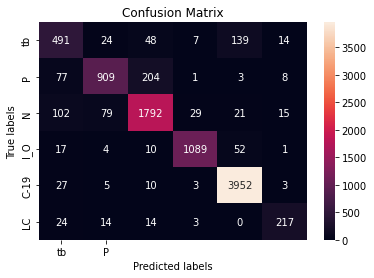

In [ ]:
ax=plt.subplot()
sns.heatmap(conf_mat,annot=True,ax=ax,fmt='g')#annot=True to annotate cells, fmt='g' numbers not scientific form
ax.set_xlabel('Predicted labels'); 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['tb', 'P','N', 'l_O', 'C-19', 'LC']); 
ax.yaxis.set_ticklabels(['tb', 'P','N', 'l_O', 'C-19', 'LC']);
ax.set(yticks=[0, 4], xticks=[0.5, 1.5])
ax.yaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0.5))